## Read AAPL bond prices

In [1]:
import pandas as pd
apple_bond_data=pd.read_csv( 'bond_daily_data_aapl_2014_2015.csv', index_col=4)

apple_bond_data.index=pd.to_datetime(apple_bond_data.index)
apple_bond_data.head(2)

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration
Date,,,,,,,,,,,,,,
2014-01-02,AAPL,05-03-2023,2.4,C13886711380001205,78.645739,77.245739,77.945739,90.126267,90.229367,90.177817,0.036577,0.036437,0.036507,8.276886
2014-01-03,AAPL,05-03-2023,2.4,C13887581650001384,78.475559,77.075559,77.775559,90.060200,90.163200,90.111700,0.036669,0.036530,0.036600,8.273592


## Calculate difference of option-adjusted spread

In [4]:
apple_bond_data['daily_change_oas']=apple_bond_data.mid_oas.diff()
apple_bond_data.head()

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas
Date,,,,,,,,,,,,,,,
2014-01-02,AAPL,05-03-2023,2.4,C13886711380001205,78.645739,77.245739,77.945739,90.126267,90.229367,90.177817,0.036577,0.036437,0.036507,8.276886,NaN
2014-01-03,AAPL,05-03-2023,2.4,C13887581650001384,78.475559,77.075559,77.775559,90.060200,90.163200,90.111700,0.036669,0.036530,0.036600,8.273592,-0.170181
2014-01-06,AAPL,05-03-2023,2.4,C13890153420001038,81.022553,79.622553,80.322553,90.133400,90.236400,90.184900,0.036580,0.036441,0.036511,8.265755,2.546995
2014-01-07,AAPL,05-03-2023,2.4,C13890999990000654,78.274332,76.874332,77.574332,90.499533,90.602933,90.551233,0.036089,0.035950,0.036020,8.265707,-2.748221
2014-01-08,AAPL,05-03-2023,2.4,C13891864450001040,81.398504,79.998504,80.698504,89.861067,89.963667,89.912367,0.036956,0.036817,0.036887,8.258106,3.124171


## Calculate bond returns

#Duration is the weighted average of the times until the bond cash flow is received.

In [5]:
apple_bond_data['bond_returns']=(-apple_bond_data.duration*apple_bond_data.daily_change_oas)/100
apple_bond_data.tail()

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas,bond_returns
Date,,,,,,,,,,,,,,,,
2015-12-22,AAPL,05-03-2023,2.4,C14507938210002830,73.254508,71.454508,72.354508,97.496833,97.614133,97.555483,0.027780,0.027600,0.027690,6.727423,0.869531,-0.058497
2015-12-23,AAPL,05-03-2023,2.4,C14508800160002352,73.425291,71.625291,72.525291,97.301067,97.418167,97.359617,0.028082,0.027902,0.027992,6.723814,0.170783,-0.011483
2015-12-28,AAPL,05-03-2023,2.4,C14513141690002779,71.879077,70.079077,70.979077,97.538433,97.655533,97.596983,0.027724,0.027544,0.027634,6.710911,-1.546214,0.103765
2015-12-29,AAPL,05-03-2023,2.4,C14513998530002920,72.964379,71.164379,72.064379,97.024467,97.140867,97.082667,0.028516,0.028337,0.028427,6.705948,1.085302,-0.072780
2015-12-30,AAPL,05-03-2023,2.4,C14514888810005239,70.017491,68.217491,69.117491,97.091500,97.207900,97.149700,0.028414,0.028235,0.028325,6.703452,-2.946888,0.197543


### Plot cumulative bond returns 

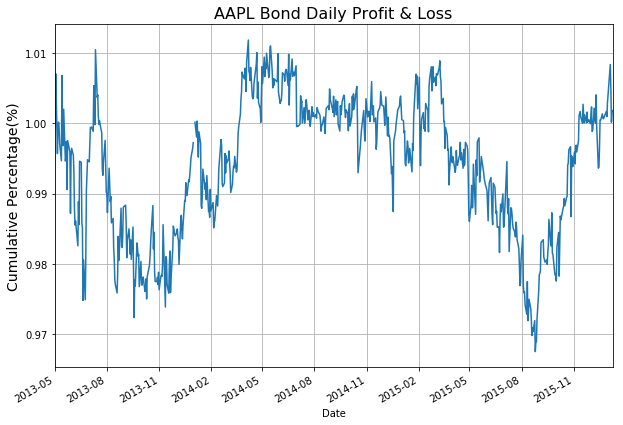

In [13]:
import matplotlib.pyplot as plt

(apple_bond_data.bond_returns/100+1).cumprod().plot(figsize=(10,7))
plt.title('AAPL Bond Daily Profit & Loss',fontsize=16)
plt.ylabel('Cumulative Percentage(%)',fontsize=14)
plt.grid()
plt.show()

## Store bond returns in a CSV file

In [14]:
apple_bond_data.to_csv('bond_returns_aapl2.csv')

# Sentiment Strategy on 'AAPL' bond Prices


The steps involved in creating a trading strategy based on the sentiment scores are:

1. Read bond returns of AAPL
2. Read sentiment score of AAPL
2. Generate trading signals
3. Calculate returns of the strategy

Note: Steps involved in creating sentiment strategies on bond is identical to the stock.

## Read bond returns of AAPL

In [15]:
import pandas as pd
aapl_bond_data=pd.read_csv('bond_returns_aapl2.csv',index_col=0)

aapl_bond_data.index=pd.to_datetime(aapl_bond_data.index)
aapl_bond_data.head(2)

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas,bond_returns
Date,,,,,,,,,,,,,,,,
2014-01-02,AAPL,05-03-2023,2.4,C13886711380001205,78.645739,77.245739,77.945739,90.126267,90.229367,90.177817,0.036577,0.036437,0.036507,8.276886,NaN,NaN
2014-01-03,AAPL,05-03-2023,2.4,C13887581650001384,78.475559,77.075559,77.775559,90.060200,90.163200,90.111700,0.036669,0.036530,0.036600,8.273592,-0.170181,0.01408


## Read sentiment score of AAPL

In [17]:
apple_daily_sentiment_score=pd.read_csv('apple_daily_sentiment.csv',index_col=0)
apple_daily_sentiment_score.index=pd.to_datetime(apple_daily_sentiment_score.index)
apple_daily_sentiment_score.head(2)

,trading_time,score
Date,,
2014-01-28,2014-01-28 09:30:00,-0.131148
2014-01-29,2014-01-29 09:30:00,0.291667


In [18]:
prices=pd.concat([aapl_bond_data,apple_daily_sentiment_score],axis=1)
prices.dropna(inplace=True)
prices.head()

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas,bond_returns,trading_time,score
Date,,,,,,,,,,,,,,,,,,
2014-01-28,AAPL,05-03-2023,2.4,C13909148480001049,93.727776,92.327776,93.027776,90.860733,90.964133,90.912433,0.035669,0.035529,0.035599,8.209708,-0.154951,0.012721,2014-01-28 09:30:00,-0.131148
2014-01-29,AAPL,05-03-2023,2.4,C13910020800001548,94.893053,93.493053,94.193053,91.382567,91.486667,91.434617,0.034970,0.034831,0.034900,8.210797,1.165277,-0.095679,2014-01-29 09:30:00,0.291667
2014-01-30,AAPL,05-03-2023,2.4,C13910912400002272,89.997279,88.597279,89.297279,91.513600,91.617800,91.565700,0.034797,0.034658,0.034728,8.208973,-4.895774,0.401893,2014-01-30 09:30:00,0.571429
2014-01-31,AAPL,05-03-2023,2.4,C13911750970000929,93.742762,92.342762,93.042762,91.599433,91.703733,91.651583,0.034674,0.034534,0.034604,8.206878,3.745483,-0.307387,2014-01-31 09:30:00,-0.166667
2014-02-03,AAPL,05-03-2023,2.4,C13914360630001381,92.611456,91.211456,91.911456,92.184400,92.289400,92.236900,0.033911,0.033772,0.033842,8.205526,-1.131306,0.092830,2014-02-03 09:30:00,-0.222222


## Generate trading signals

In [20]:
import numpy as np
prices['signal']=0
prices.loc[prices.score>0.25,'signal']=1
prices.loc[prices.score<-0.25,'signal']=-1
prices.head(2)

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas,bond_returns,trading_time,score,signal
Date,,,,,,,,,,,,,,,,,,,
2014-01-28,AAPL,05-03-2023,2.4,C13909148480001049,93.727776,92.327776,93.027776,90.860733,90.964133,90.912433,0.035669,0.035529,0.035599,8.209708,-0.154951,0.012721,2014-01-28 09:30:00,-0.131148,0
2014-01-29,AAPL,05-03-2023,2.4,C13910020800001548,94.893053,93.493053,94.193053,91.382567,91.486667,91.434617,0.034970,0.034831,0.034900,8.210797,1.165277,-0.095679,2014-01-29 09:30:00,0.291667,1


In [21]:
# Calculate strategy returns
prices['strategy_return'] = prices['signal'].shift(1) * prices['bond_returns']
prices = prices.dropna()
prices.tail(2)

,ticker,maturity_date,coupon,seq_id,bid_oas,ask_oas,mid_oas,bid_price,ask_price,mid_price,bid_yield,ask_yield,mid_yield,duration,daily_change_oas,bond_returns,trading_time,score,signal,strategy_return
Date,,,,,,,,,,,,,,,,,,,,
2016-01-07,AAPL,05-03-2023,2.4,C14521858920017029,73.142572,71.342572,72.242572,98.197133,98.314833,98.255983,0.026725,0.026545,0.026635,6.688655,-2.072899,0.138649,2016-01-07 09:30:00,0.333333,1,-0.138649
2016-01-08,AAPL,05-03-2023,2.4,C14522685360009835,72.754594,70.954594,71.854594,98.433567,98.551567,98.492567,0.026365,0.026185,0.026275,6.686865,-0.387977,0.025944,2016-01-08 09:30:00,0.000000,0,0.025944


### Plot the cumulative returns

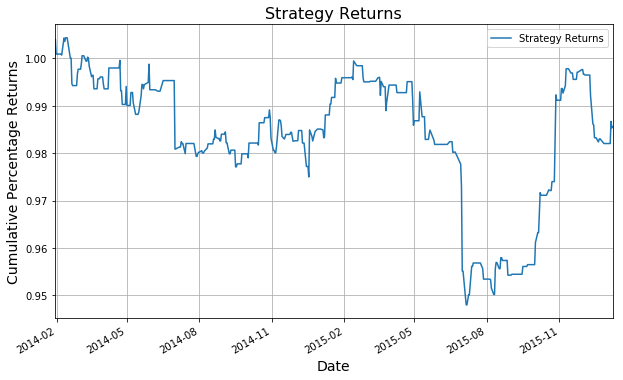

In [22]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate and plot the cumulative returns
(prices['strategy_return']/100+1).cumprod().plot(figsize=(10, 6))

# Label the graph
plt.legend(['Strategy Returns'])
plt.title('Strategy Returns', fontsize=16)
plt.grid()
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Percentage Returns', fontsize=14)
plt.show()